## Group No: 231

## Group Member Names:
1. ASHIQUE ZZAMAN (2021sc04612)


## Journal used for the implemetation
Journal title: Convolutional Neural Network (CNN) Based Speech-Emotion Recognition

Authors: Alif Bin Abdul Qayyum, Asiful Arefeen, Celia Shahnaz

Journal Name: IEEE

Year: 2019

# 0. Installing few of required libraries based on versions

In [ ]:
#!pip install numpy==1.21

In [ ]:
#!pip install numba==0.53.0

In [ ]:
#!pip install librosa==0.9.2

# 1. Import the required libraries

In [1]:
##---------Type the code below this line------------------##

# Importing the libraries

import pandas as pd
import numpy as np

import os
import sys

import opendatasets as od

from joblib import Parallel, delayed
import timeit

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from scipy.signal import hilbert
from scipy.stats import kurtosis, skew

# Libraries to play the audio files

import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import (Conv1D, MaxPooling1D, AveragePooling1D, Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD


import tensorflow as tf
from tensorflow.keras import layers, models


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")


F:\EDU\Ananconda\conda_install\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Done


# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

Provide the URL of the data used.

Write Code for converting the above downloaded data into a form suitable for DL



### About dataset
Context: The SAVEE database was recorded from four native English male speakers (identified as DC, JE, JK, KL), postgraduate students and researchers at the University of Surrey aged from 27 to 31 years. Emotion has been described psychologically in discrete categories: anger, disgust, fear, happiness, sadness and surprise. This is supported by the cross-cultural studies of Ekman and studies of automatic emotion recognition tended to focus on recognizing these. We added neutral to provide recordings of 7 emotion categories. The text material consisted of 15 TIMIT sentences per emotion: 3 common, 2 emotion-specific and 10 generic sentences that were different for each emotion and phonetically-balanced. The 3 common and 2 × 6 = 12 emotion-specific sentences were recorded as neutral to give 30 neutral sentences.


In [2]:
# Per datset used in the referred journal, we are also using "Surrey Audio-Visual Expressed Emotion (SAVEE)" dataset

od.download("https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee?select=ALL")


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 107M/107M [00:15<00:00, 7.16MB/s]


In [3]:
# Preprocessing of the data

Savee = "./surrey-audiovisual-expressed-emotion-savee/ALL/"
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')


# Creating dataframe for emotion of files

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


# Creating dataframe for path of files

path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())


neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: Emotions, dtype: int64


In [4]:
# Showing data

data_path = Savee_df
data_path.head()


,Emotions,Path
0,angry,./surrey-audiovisual-expressed-emotion-savee/A...
1,angry,./surrey-audiovisual-expressed-emotion-savee/A...
2,angry,./surrey-audiovisual-expressed-emotion-savee/A...
3,angry,./surrey-audiovisual-expressed-emotion-savee/A...
4,angry,./surrey-audiovisual-expressed-emotion-savee/A...


In [ ]:
##---------Type the code below this line------------------##

# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

### Data Visualisation and Exploration

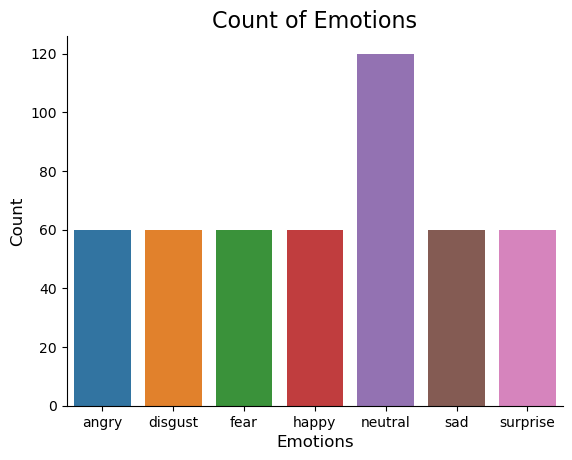

In [5]:
# Visualizing count of emotions 

plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


In [6]:
# Sampling rate is 44.1 KHz
# Librosa is a Python library for analyzing audio and music. 
# It can be used to extract the data from the audio files we will see it later.

data,sr = librosa.load(file_path[0], sr=44100)
sr


44100

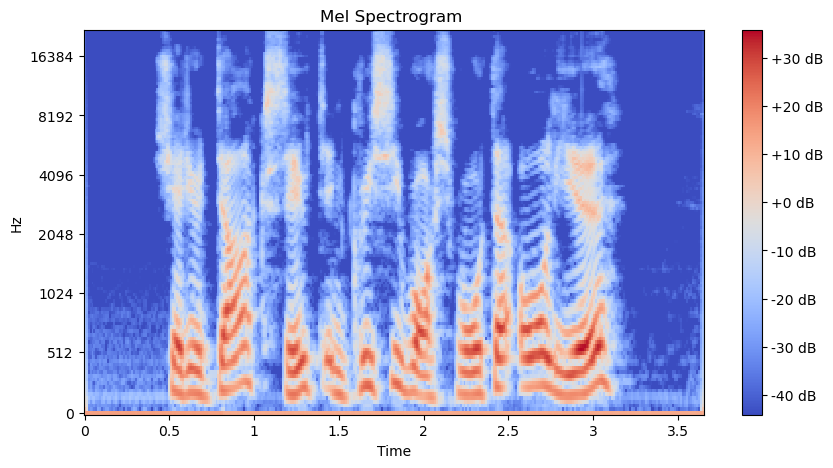

In [7]:
# log mel spectrogram

plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')


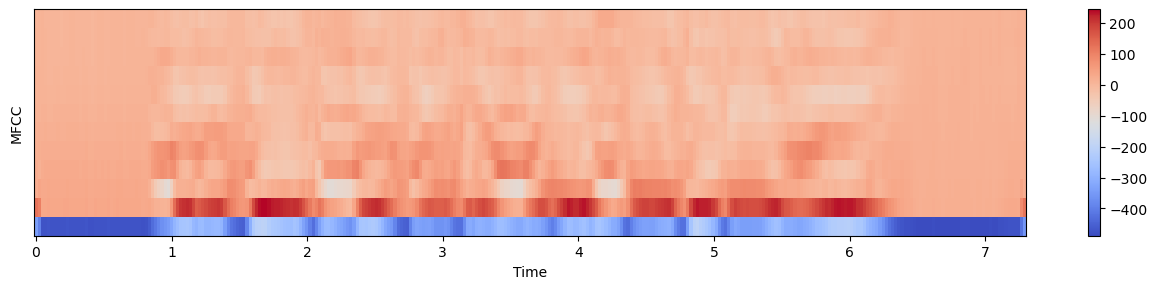

In [8]:
# Mel-Frequency Cepstral Coefficients

mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=12)

plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)


### Data augmentation

In [9]:
# Noise

def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data


# Stretch

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)


# Shift

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)


# Pitch

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


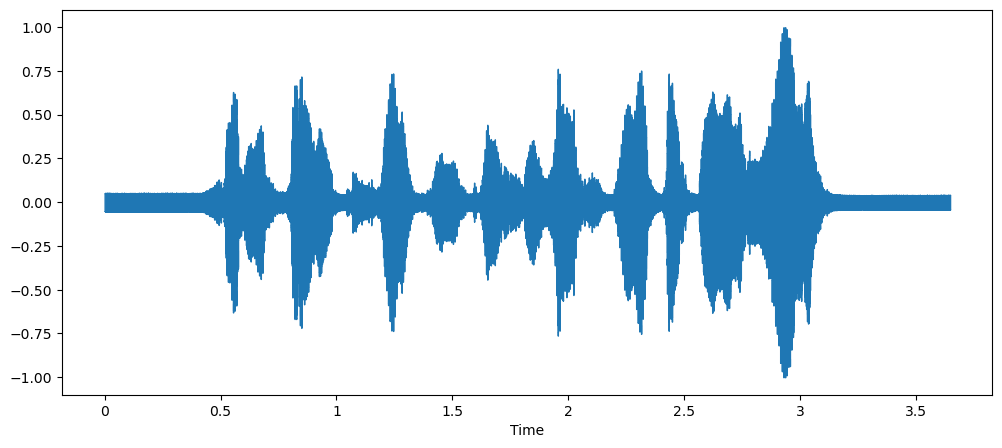

In [10]:
# Normal audio

plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)


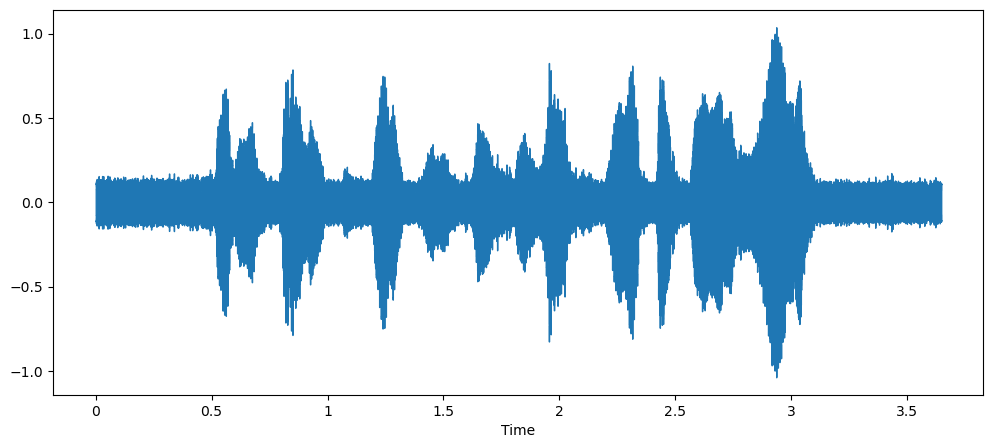

In [11]:
# Audio with noise

x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)


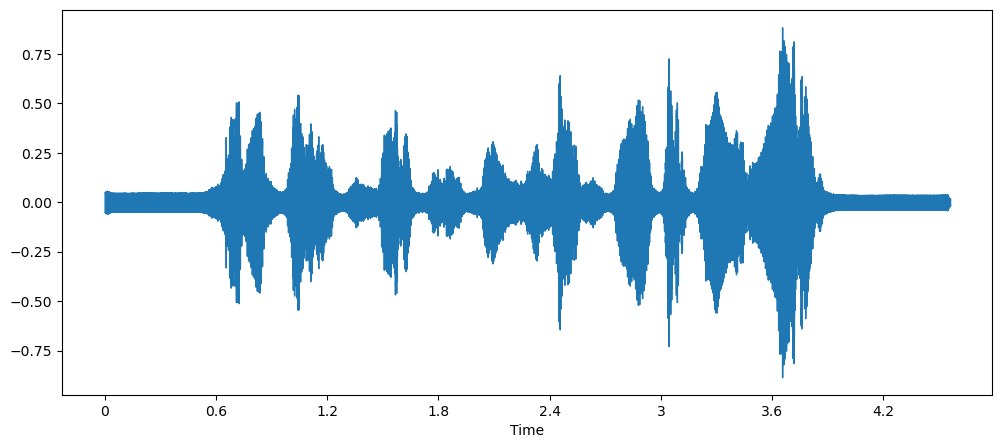

In [12]:
# Stretched audio

x = stretch(data, rate=0.8)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)


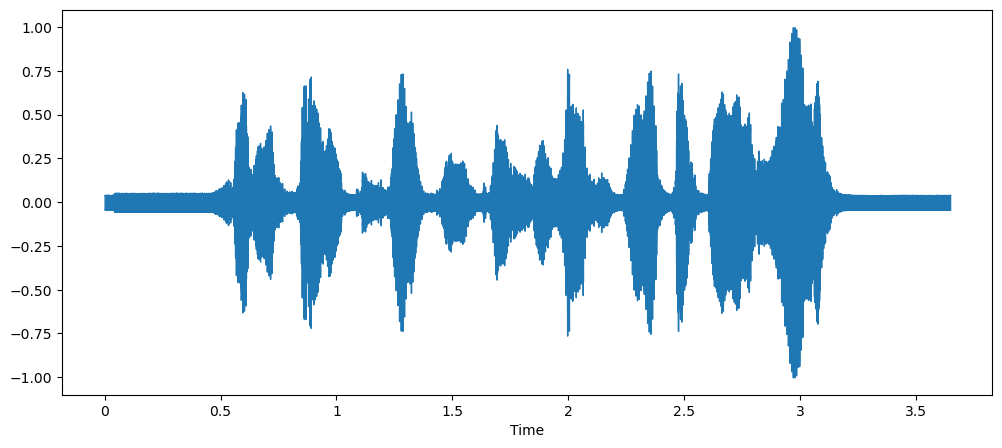

In [13]:
# Shifted audio

x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)


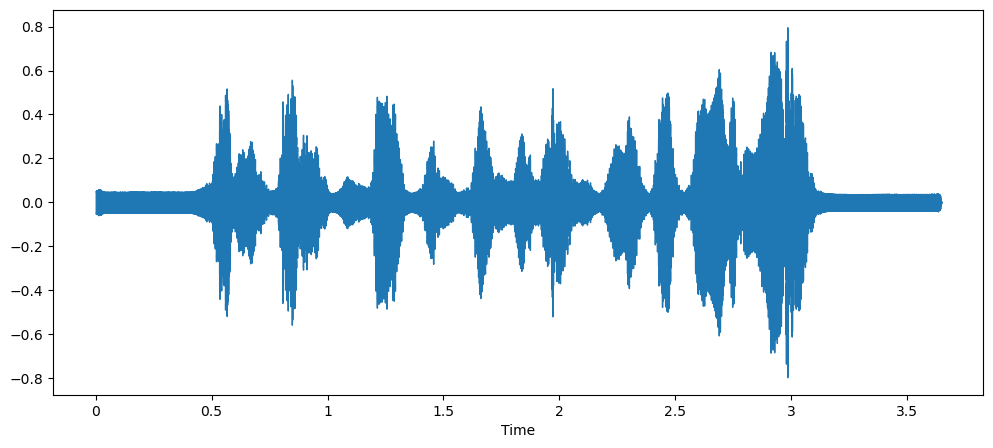

In [14]:
# Audio with pitch

x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)


### Feature extraction

In [15]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)


def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)


def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)


def msf(data,sr,frame_length=2048,hop_length=512):

    # Define parameters for the feature extraction
    n_filters_auditory = 19
    n_filters_modulation = 5
    n_fft = 1024
    hop_length = 512

    # Apply auditory filter bank
    auditory_envelopes = librosa.feature.melspectrogram(data, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_filters_auditory)

    # Calculate modulation envelopes using the Hilbert transform
    hilbert_envelopes = np.abs(hilbert(auditory_envelopes))

    # Apply modulation filter bank
    modulation_envelopes = librosa.feature.melspectrogram(S=hilbert_envelopes, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_filters_modulation)

    # Flatten modulation spectra to obtain MSF features
    msf = modulation_envelopes.flatten()
    
    return np.squeeze(msf.T)


def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length),
                      msf(data,sr,frame_length,hop_length)
                     ))
    return result


def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    
    return audio


### Getting features

In [16]:
start = timeit.default_timer()

# Defining a function to get features for a single audio file

def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    return X, Y

paths = data_path.Path
emotions = data_path.Emotions


# Running the loop in parallel

results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in zip(paths, emotions))


# Collecting the results

X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)


stop = timeit.default_timer()
print('Time: ', stop - start)    

Time:  195.19550330000004


In [17]:
len(X), len(Y), data_path.Path.shape

(1920, 1920, (480,))

### Saving features

In [18]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2907,2908,2909,2910,2911,2912,2913,2914,2915,Emotions
0,0.013184,0.020020,0.025391,0.021484,0.016113,0.009277,0.003906,0.003418,0.011230,0.023438,...,0.000440,0.000383,0.000397,0.000523,0.000566,0.000428,0.000262,0.000189,0.000122,angry
1,0.013184,0.020020,0.025391,0.021484,0.016113,0.009277,0.003906,0.003418,0.011230,0.023438,...,0.000440,0.000384,0.000396,0.000521,0.000567,0.000430,0.000262,0.000189,0.000122,angry
2,0.014160,0.020508,0.029297,0.027832,0.020996,0.014648,0.010742,0.018066,0.031250,0.044922,...,0.000146,0.000178,0.000195,0.000209,0.000234,0.000163,0.000102,0.000091,0.000042,angry
3,0.019043,0.026367,0.048828,0.067871,0.074707,0.072266,0.065430,0.058594,0.057617,0.071289,...,0.000155,0.000191,0.000201,0.000214,0.000241,0.000168,0.000106,0.000096,0.000046,angry
4,0.019531,0.026367,0.032227,0.025879,0.020020,0.028809,0.034180,0.044922,0.059082,0.060059,...,0.000144,0.000194,0.000108,0.000155,0.000084,0.000124,0.000068,0.000097,0.000102,angry


### Cleaning features

In [19]:
# Visualizing the null values in features

print(Emotions.isna().any())


0           False
1           False
2           False
3           False
4           False
            ...  
2912         True
2913         True
2914         True
2915         True
Emotions    False
Length: 2917, dtype: bool


In [20]:
# Imputing the null values in features

Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape


0           False
1           False
2           False
3           False
4           False
            ...  
2912        False
2913        False
2914        False
2915        False
Emotions    False
Length: 2917, dtype: bool


(1920, 2917)

In [21]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2912        0
2913        0
2914        0
2915        0
Emotions    0
Length: 2917, dtype: int64

### Data preparation

In [22]:
# Taking all rows and all cols without last col for X which include features
# Taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values


In [23]:
# Onehotencoding our Y as this is a multiclass classification problem 

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [24]:
print(Y.shape)
X.shape

(1920, 7)


(1920, 2916)

In [ ]:
##---------Type the code below this line------------------##

## Split the data into training set and testing set
##---------Type the code below this line------------------##

## Identify the target variables.
##---------Type the code below this line------------------##


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((1536, 2916), (1536, 7), (384, 2916), (384, 7))

In [26]:
# Scaling our data with sklearn's Standard scaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((1536, 2916), (1536, 7), (384, 2916), (384, 7))

## 4. Deep Neural Network Architecture


## 4.1 Design the architecture that you will be using

* CNN / RNN / Transformer as per the journal referenced



### Applying early stopping for all models

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)


In [ ]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)


In [27]:
# Reshaping for CNN Model

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape


((1536, 2916, 1), (1536, 7), (384, 2916, 1), (384, 7))

In [28]:
# Defining the model

model = models.Sequential()

# Adding 1D convolutional layers with batch normalization and max pooling
model.add(layers.Conv1D(32, kernel_size=21, activation='relu', padding='same', input_shape=(x_traincnn.shape[1],1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Conv1D(64, kernel_size=19, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Conv1D(128, kernel_size=17, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Conv1D(256, kernel_size=15, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Conv1D(512, kernel_size=13, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Conv1D(1024, kernel_size=11, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Conv1D(1024, kernel_size=9, activation='relu', padding='same'))
model.add(layers.BatchNormalization())


# Global max pooling layer

model.add(layers.GlobalMaxPooling1D())


# Dense layer with 128 nodes

model.add(layers.Dense(128, activation='relu'))

# Output layer with 7 nodes and softmax activation

model.add(layers.Dense(7, activation='softmax'))


# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Print the model summary

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2916, 32)          704       
                                                                 
 batch_normalization (BatchN  (None, 2916, 32)         128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1458, 32)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1458, 64)          38976     
                                                                 
 batch_normalization_1 (Batc  (None, 1458, 64)         256       
 hNormalization)                                                 
                                                        

## 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



In [40]:
# Number of layers

num_layers = len(model.layers)
print("Number of layers: ", num_layers)


# Total number of trainable parameters

total_trainable_params = model.count_params()
print("Total number of trainable parameters: ", total_trainable_params)

Number of layers:  23
Total number of trainable parameters:  17725959


# 5. Training the model 


In [ ]:
# Configure the training, by using appropriate optimizers, regularizations and loss functions
##---------Type the code below this line------------------##

In [42]:


# Loading and preprocessing the dataset
# X_train, X_val, y_train, y_val = load_and_preprocess_data()

# Assuming already loaded and preprocessed the dataset.
# X_train: Training audio data
# X_val: Validation audio data
# y_train: Training labels (one-hot encoded)
# y_val: Validation labels (one-hot encoded)

# Defining the model architecture (as described in the previous answer)

# Defining hyperparameters

initial_learning_rate = 0.001
beta_1 = 0.9
beta_2 = 0.999
epochs = 200

# Defining the optimizer with the specified hyperparameters

optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate, beta_1=beta_1, beta_2=beta_2)


# Compiling the model with categorical crossentropy loss

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Training the model

history = model.fit(x_traincnn, y_train, epochs=epochs, validation_data=(x_testcnn, y_test),batch_size=64)




Epoch 1/10
24/24 [==============================] - 387s 16s/step - loss: 2.0300 - accuracy: 0.2904 - val_loss: 11.9641 - val_accuracy: 0.1198
Epoch 2/10
24/24 [==============================] - 340s 14s/step - loss: 1.5476 - accuracy: 0.4023 - val_loss: 6.4472 - val_accuracy: 0.1484
Epoch 3/10
24/24 [==============================] - 287s 12s/step - loss: 1.3976 - accuracy: 0.4466 - val_loss: 5.5736 - val_accuracy: 0.1354
Epoch 4/10
24/24 [==============================] - 286s 12s/step - loss: 1.2513 - accuracy: 0.5176 - val_loss: 3.8656 - val_accuracy: 0.1302
Epoch 5/10
24/24 [==============================] - 281s 12s/step - loss: 1.2053 - accuracy: 0.5293 - val_loss: 4.9564 - val_accuracy: 0.1380
Epoch 6/10
24/24 [==============================] - 291s 12s/step - loss: 1.0840 - accuracy: 0.5938 - val_loss: 2.6453 - val_accuracy: 0.2500
Epoch 7/10
24/24 [==============================] - 297s 12s/step - loss: 0.9587 - accuracy: 0.6465 - val_loss: 3.9130 - val_accuracy: 0.1797
Epoch

In [ ]:
##---------Type the code below this line------------------##
#history = model.fit(x_traincnn, y_train, epochs=epochs, validation_data=(x_testcnn, y_test),batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

# 6. Test the model


In [44]:
# Predicting on test data.

pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)


# Checking for random predictions

df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(3)

12/12 [==============================] - 16s 1s/step


,Predicted Labels,Actual Labels
0,fear,angry
1,fear,happy
2,fear,fear


In [46]:
# Predicting on test data.

pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)


# Checking for random predictions

df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.tail(3)

12/12 [==============================] - 15s 1s/step


,Predicted Labels,Actual Labels
381,surprise,surprise
382,disgust,disgust
383,sad,neutral


In [ ]:
##---------Type the code below this line------------------##

# 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


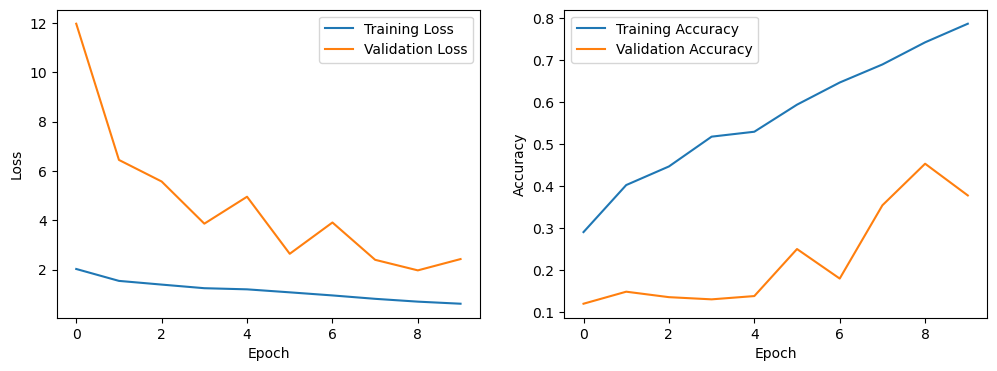

In [47]:
# Plotting training and validation loss and accuracy curves

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


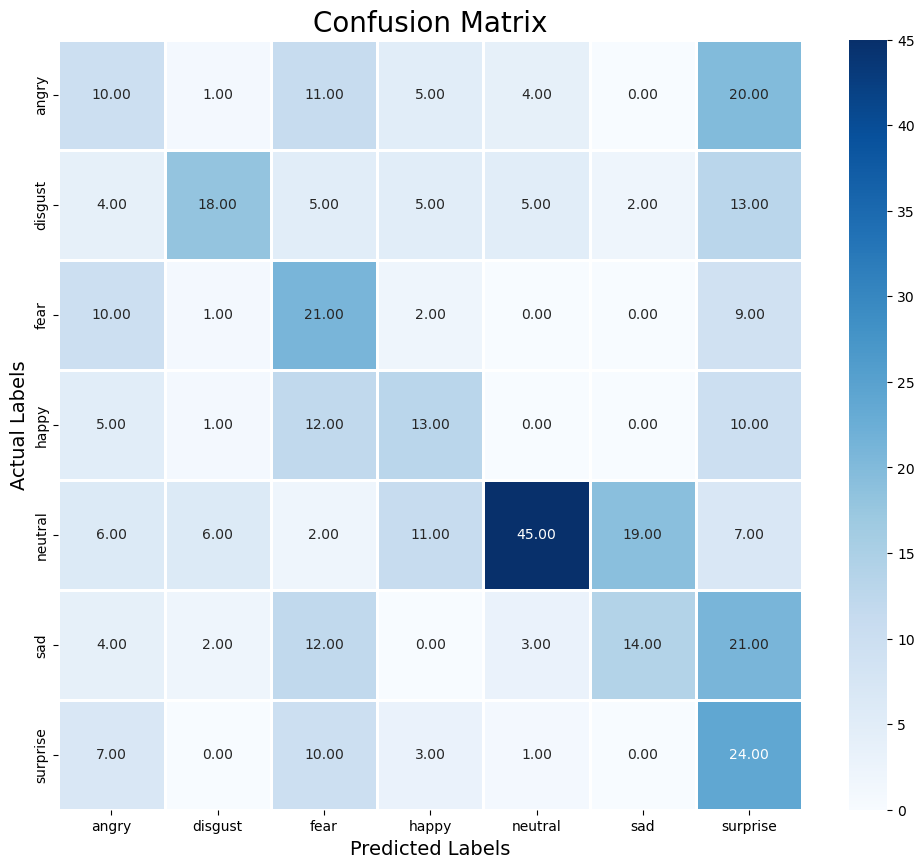

              precision    recall  f1-score   support

       angry       0.22      0.20      0.21        51
     disgust       0.62      0.35      0.44        52
        fear       0.29      0.49      0.36        43
       happy       0.33      0.32      0.32        41
     neutral       0.78      0.47      0.58        96
         sad       0.40      0.25      0.31        56
    surprise       0.23      0.53      0.32        45

    accuracy                           0.38       384
   macro avg       0.41      0.37      0.36       384
weighted avg       0.46      0.38      0.39       384



In [48]:
# Showing confusion matrix and classification report

cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))


In [ ]:
##---------Type the code below this line------------------##

### Conclusion

We tried to implement the methodologies from the selected Paper, however we can see that the accuracy and evaluation metrics in our model may not show that better because we could run for only 10 epochs only due to time constraints in comparision to 400 epochs ran in the model presented in the paper. However we can see that the accuracy is increasing by each epoch and if we train the model for 50-100 epochs, it will do better. Also, we can see Predicted Labels and Actual Labels in our model is doing good as well  

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck